In [2]:
import shap
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

picklepath = ''

met_all = pd.read_pickle(picklepath + 'met_all.pickle')

pro_all = pd.read_pickle(picklepath +'pro_all.pickle')




shap_dict =  pickle.load( open( picklepath + "shap_pmet_all.pickle", "rb" ) )
shap_values=np.asarray(list(shap_dict.values()))

In [3]:
avgshap =  pd.read_pickle(picklepath + 'shap_mean_abs_pmet_all.pickle')
citrate = np.array(met_all["Citric acid"])
cit_shap = np.array(shap_dict['Citric acid'])

In [4]:
protein_keys = list(pro_all.keys())

for i in range(0,len(protein_keys)):
    protein_keys[i] = protein_keys[i].split(" ")[0]

In [5]:
all_correlations = []
for metabolite in list(shap_dict.keys()):
    metabolite_shap = list(shap_dict[metabolite])
    metabolite_values = list(met_all[metabolite])
    proteins = list(pro_all.keys())
    correlations = []
    for value in proteins:
        temp = list(pro_all[value])
        a,b = scipy.stats.spearmanr(metabolite_values, temp)
        correlations.append(a)
        
    f, ax = plt.subplots(figsize=(7, 7))
    sns.scatterplot(x=correlations, y = list(avgshap[metabolite]))
    ax.set(yscale="log")
    plt.savefig('horseshoe_'+ metabolite.replace("?", "") +'.svg')
    plt.savefig('horseshoe_'+ metabolite.replace("?", "") +'.png')
    plt.close()
    all_correlations.append(correlations)

In [6]:
citric_df = pd.DataFrame()

names = []
for value in list(pro_all.keys()):
    names.append(value.split(" ")[0])
citric_df['Name'] = names

citric_df["|Spearman's ρ|"] = abs(np.asarray(all_correlations[20]))
citric_df['Mean |SHAP|'] = list(avgshap["Citric acid"])
citric_df["Spearman's ρ"] = (np.asarray(all_correlations[20]))
rank = []
for i in range(1,len(citric_df)+1):
    rank.append(i)


In [7]:
citric_df = citric_df.sort_values(by="|Spearman's ρ|", ascending = False)
citric_df['Correlation Rank'] = rank
citric_df = citric_df.sort_values(by='Mean |SHAP|', ascending = False)
citric_df['SHAP Rank'] = rank



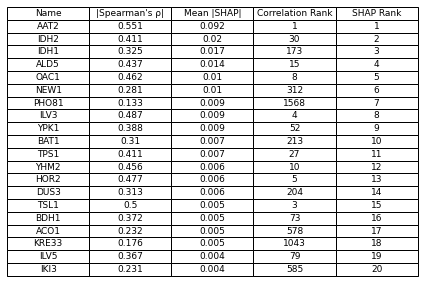

In [8]:
plt.rcParams['svg.fonttype'] = 'none'
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = citric_df.round(3)[0:20]
df = df.drop(["Spearman's ρ"], axis=1)
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', fontsize = 28)
table.auto_set_font_size(False)
table.set_fontsize(9)
fig.tight_layout()
plt.savefig('citrate_corr_table.svg')
plt.show()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


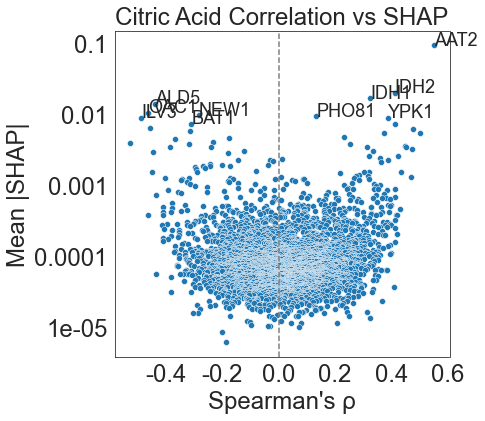

In [9]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(6, 6))
p=sns.scatterplot(x=citric_df["Spearman's ρ"], y = citric_df['Mean |SHAP|'])
ax.set(yscale="log")



sns.set(font_scale = 1.5)


#p.axhline(0, color = 'tab:gray', linestyle = '--')
p.axvline(0, color = 'tab:gray', linestyle = '--')
#ax.set(yscale="log")
p.set_xlabel("Spearman's ρ", fontsize = 24)
p.set_ylabel("Mean |SHAP|", fontsize = 24)
p.set_title("Citric Acid Correlation vs SHAP", fontsize = 24)
p.set_yticklabels(p.get_yticks(), size = 24)
xticks = p.get_xticks()
xticks_fix = []
for value in xticks:
    xticks_fix.append(round(value,1))
p.set_xticklabels(xticks_fix, size = 24)

for i in range(0,10):
    ax.annotate(list(citric_df["Name"])[i], (list(citric_df["Spearman's ρ"])[i], list(citric_df['Mean |SHAP|'])[i]))

plt.savefig('citrate_horseshoe.svg')  

In [10]:
i = 0
shap_corrs = []
while i < len(cit_shap[0]):
    a,b = scipy.stats.spearmanr(citrate, cit_shap[:,i])
    shap_corrs.append(a)
    i+=1

In [11]:
#AAT2
aat2 = list(pro_all['AAT2 (YLR027C)'])
#ALD5
ald5 = list(pro_all['ALD5 (YER073W)'])
#IDH2
idh2 = list(pro_all['IDH2 (YOR136w)'])

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


0.8228125559690282
0.7409867117539155


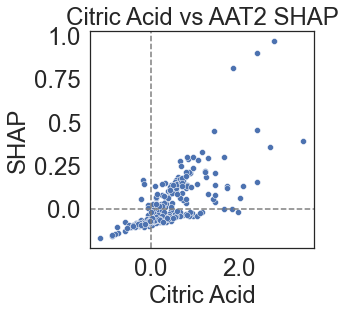

In [12]:
sns.set_style("white")

f, ax = plt.subplots(figsize=(4, 4))
sns.set(font_scale = 1.5)

p = sns.scatterplot(y=cit_shap[:,6], x = citrate)
p.axhline(0, color = 'tab:gray', linestyle = '--')
p.axvline(0, color = 'tab:gray', linestyle = '--')
#ax.set(yscale="log")
p.set_xlabel("Citric Acid", fontsize = 24)
p.set_ylabel("SHAP", fontsize = 24)
p.set_title("Citric Acid vs AAT2 SHAP", fontsize = 24)
p.set_yticklabels(p.get_yticks(), size = 24)
xticks = p.get_xticks()
xticks_fix = []
for value in xticks:
    xticks_fix.append(round(value,1))
p.set_xticklabels(xticks_fix, size = 24)


#norm = plt.Normalize(np.asarray(aat2).min(), np.asarray(aat2).max())
#sm = plt.cm.ScalarMappable( norm=norm)
#sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
#ax.figure.colorbar(sm, label = 'AAT2')








a,b = scipy.stats.spearmanr(citrate, cit_shap[:,6])
c,d = scipy.stats.pearsonr(citrate, cit_shap[:,6])
plt.savefig('citrate_AAT2_SHAP_corr.svg')
plt.savefig('citrate_AAT2_SHAP_corr.png')
print(a)
print(c)
plt.show()
plt.close()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


0.8185767771919427
0.7068499212372291


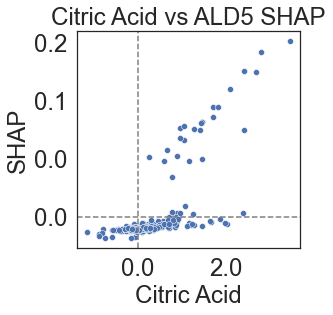

In [13]:
sns.set_style("white")

f, ax = plt.subplots(figsize=(4, 4))
sns.set(font_scale = 1.5)

p = sns.scatterplot(y=cit_shap[:,90], x = citrate)
p.axhline(0, color = 'tab:gray', linestyle = '--')
p.axvline(0, color = 'tab:gray', linestyle = '--')
#ax.set(yscale="log")
p.set_ylabel("SHAP", fontsize = 24)
p.set_xlabel("Citric Acid", fontsize = 24)
p.set_title("Citric Acid vs ALD5 SHAP", fontsize = 24)


yticks = p.get_yticks()
yticks_fix = []
for value in yticks:
    yticks_fix.append(round(value,1))
p.set_yticklabels(yticks_fix, size = 24)
xticks = p.get_xticks()
xticks_fix = []
for value in xticks:
    xticks_fix.append(round(value,1))
p.set_xticklabels(xticks_fix, size = 24)


#norm = plt.Normalize(np.asarray(aat2).min(), np.asarray(aat2).max())
#sm = plt.cm.ScalarMappable( norm=norm)
#sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
#ax.figure.colorbar(sm, label = 'AAT2')








a,b = scipy.stats.spearmanr(citrate, cit_shap[:,90])
c,d = scipy.stats.pearsonr(citrate, cit_shap[:,90])
plt.savefig('citrate_ALD5_SHAP_corr.svg')
plt.savefig('citrate_ALD5_SHAP_corr.png')
print(a)
print(c)
plt.show()
plt.close()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


0.6749418491583253
0.7172352451892652


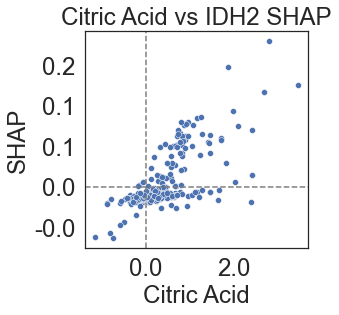

In [14]:
sns.set_style("white")

f, ax = plt.subplots(figsize=(4, 4))
sns.set(font_scale = 1.5)

p = sns.scatterplot(y=cit_shap[:,1170], x = citrate)
p.axhline(0, color = 'tab:gray', linestyle = '--')
p.axvline(0, color = 'tab:gray', linestyle = '--')
#ax.set(yscale="log")
p.set_ylabel("SHAP", fontsize = 24)
p.set_xlabel("Citric Acid", fontsize = 24)
p.set_title("Citric Acid vs IDH2 SHAP", fontsize = 24)
yticks = p.get_yticks()
yticks_fix = []
for value in yticks:
    yticks_fix.append(round(value,1))
p.set_yticklabels(yticks_fix, size = 24)
xticks = p.get_xticks()
xticks_fix = []
for value in xticks:
    xticks_fix.append(round(value,1))
p.set_xticklabels(xticks_fix, size = 24)


#norm = plt.Normalize(np.asarray(aat2).min(), np.asarray(aat2).max())
#sm = plt.cm.ScalarMappable( norm=norm)
#sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
#ax.figure.colorbar(sm, label = 'AAT2')








a,b = scipy.stats.spearmanr(citrate, cit_shap[:,1170])
c,d = scipy.stats.pearsonr(citrate, cit_shap[:,1170])
plt.savefig('citrate_IDH2_SHAP_corr.svg')
plt.savefig('citrate_IDH2_SHAP_corr.png')
print(a)
print(c)
plt.show()
plt.close()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


0.8693511678716349


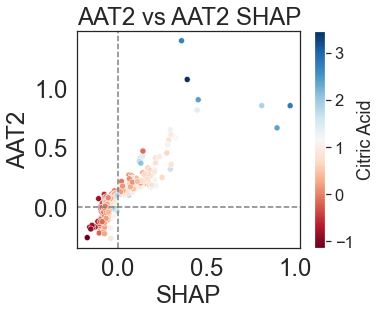

In [15]:
plt.rcParams['svg.fonttype'] = 'none'
sns.set_style("white")
f, ax = plt.subplots(figsize=(5, 4))
sns.set(font_scale = 1.5)
p = sns.scatterplot(x=cit_shap[:,6], y = aat2, hue = citrate, palette='RdBu')

p.axhline(0, color = 'tab:gray', linestyle = '--')
p.axvline(0, color = 'tab:gray', linestyle = '--')
#ax.set(yscale="log")
p.set_xlabel("SHAP", fontsize = 24)
p.set_ylabel("AAT2", fontsize = 24)
p.set_title("AAT2 vs AAT2 SHAP", fontsize = 24)
p.set_yticklabels(p.get_yticks(), size = 24)
xticks = p.get_xticks()
xticks_fix = []
for value in xticks:
    xticks_fix.append(round(value,2))
p.set_xticklabels(xticks_fix, size = 24)
a,b = scipy.stats.spearmanr(aat2, cit_shap[:,6])


norm = plt.Normalize( np.asarray(citrate).max(), np.asarray(citrate).min())
sm = plt.cm.ScalarMappable( norm=norm, cmap='RdBu')
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm, label = 'Citric Acid')

plt.savefig('AAT2_SHAP_corr.svg')
plt.savefig('AAT2_SHAP_corr.png')
print(a)
plt.show()
plt.close()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


-0.7223884940348583


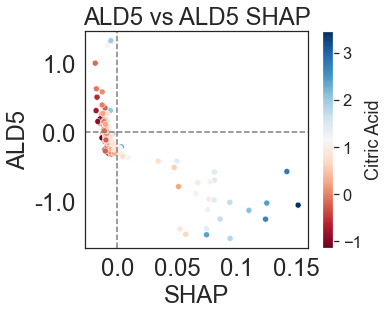

In [16]:
plt.rcParams['svg.fonttype'] = 'none'
sns.set_style("white")
f, ax = plt.subplots(figsize=(5, 4))
sns.set(font_scale = 1.5)
p = sns.scatterplot(x=cit_shap[:,90], y = ald5, hue = citrate, palette='RdBu')

p.axhline(0, color = 'tab:gray', linestyle = '--')
p.axvline(0, color = 'tab:gray', linestyle = '--')
#ax.set(yscale="log")
p.set_xlabel("SHAP", fontsize = 24)
p.set_ylabel("ALD5", fontsize = 24)
p.set_title("ALD5 vs ALD5 SHAP", fontsize = 24)
p.set_yticklabels(p.get_yticks(), size = 24)
xticks = p.get_xticks()
xticks_fix = []
for value in xticks:
    xticks_fix.append(round(value,2))
p.set_xticklabels(xticks_fix, size = 24)
a,b = scipy.stats.spearmanr(ald5, cit_shap[:,90])


norm = plt.Normalize( np.asarray(citrate).max(), np.asarray(citrate).min())
sm = plt.cm.ScalarMappable( norm=norm, cmap='RdBu')
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm, label = 'Citric Acid')

plt.savefig('ALD5_SHAP_corr.svg')
plt.savefig('ALD5_SHAP_corr.png')
print(a)
plt.show()
plt.close()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


0.8737580748448099


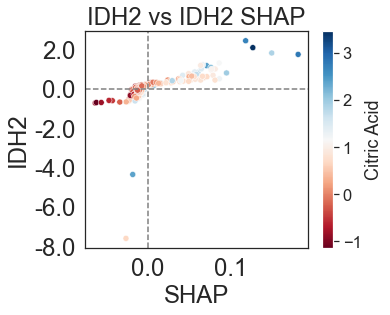

In [17]:
plt.rcParams['svg.fonttype'] = 'none'
sns.set_style("white")
f, ax = plt.subplots(figsize=(5, 4))
sns.set(font_scale = 1.5)
p = sns.scatterplot(x=cit_shap[:,1170], y = idh2, hue = citrate, palette='RdBu')

p.axhline(0, color = 'tab:gray', linestyle = '--')
p.axvline(0, color = 'tab:gray', linestyle = '--')
#ax.set(yscale="log")
p.set_xlabel("SHAP", fontsize = 24)
p.set_ylabel("IDH2", fontsize = 24)
p.set_title("IDH2 vs IDH2 SHAP", fontsize = 24)
p.set_yticklabels(p.get_yticks(), size = 24)
xticks = p.get_xticks()
xticks_fix = []
for value in xticks:
    xticks_fix.append(round(value,2))
p.set_xticklabels(xticks_fix, size = 24)
a,b = scipy.stats.spearmanr(idh2, cit_shap[:,1170])


norm = plt.Normalize( np.asarray(citrate).max(), np.asarray(citrate).min())
sm = plt.cm.ScalarMappable( norm=norm, cmap='RdBu')
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm, label = 'Citric Acid')

plt.savefig('IDH2_SHAP_corr.svg')
plt.savefig('IDH2_SHAP_corr.png')
print(a)
plt.show()
plt.close()